<a href="https://colab.research.google.com/github/melihayener/Turkcell_GYK/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Büyük Ödev 2

1. API’den Veri Çekme
Öğrenciler, kendi oluşturacakları API’den şu bilgileri almalıdır:

Müşteri ID
Ürün Adı
Kategori
Fiyat
Satın Alma Tarihi
Satın Alınan Miktar
Müşteri Memnuniyeti Skoru
2. Veri Manipülasyonu
API’den gelen veriyi Pandas kullanarak işleyin ve aşağıdaki işlemleri gerçekleştirin:

Eksik verileri tespit edip doldurma veya kaldırma
Tarih formatlarını uygun hale getirme
Belirli kategorilerde fiyat güncelleme
Müşteri memnuniyeti puanlarını analiz ederek en popüler ürünleri belirleme
3. Veri Analizi
Aşağıdaki analizleri gerçekleştirin:

En çok satın alınan ürünleri belirleyin
Fiyat ve satış miktarı arasındaki korelasyonu inceleyin
Kategorilere göre ortalama fiyat hesaplayın
Belirli bir zaman diliminde en çok satılan ürünleri bulun
Müşteri harcama seviyelerine göre gruplama yapın
4. Dinamik Fiyatlandırma
Ürünlerin ortalama fiyatlarını hesaplayarak aşırı pahalı veya ucuz ürünleri belirleyin
Piyasadan belirli bir oranda düşük fiyatlı ürünlerin fiyatını güncelleyin
5. Ürün Öneri Sistemi
Müşterilere, satın aldıkları ürünlere benzer en popüler ürünleri önerin
Öneri sistemini kategori bazında geliştirin
📝 Teslim Edilecekler
API’den verileri çeken Python kodu
Pandas ile veri manipülasyonu ve temizleme
NumPy ile dinamik fiyatlandırma
Veri analizi ve raporlama
Ürün öneri sistemi

#verı oluşturma



```
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Rastgele veri oluşturma
np.random.seed(42)
num_rows = 500  # Veri setindeki toplam satır sayısı

# Müşteri ID'leri
customer_ids = [f"CUST{str(i).zfill(4)}" for i in range(1, num_rows + 1)]

# Ürün adları ve markalar
product_brands = {
    "Telefon": ["iPhone 15", "Samsung S24", "Xiaomi 13"],
    "Bilgisayar": ["MacBook Air", "Dell XPS", "Lenovo X1"],
    "Monitör": ["LG UltraFine", "Dell Ultrasharp", "BenQ PD"],
    "Mouse": ["Logitech MX", "Razer DeathAdder", "SteelSeries Rival"],
    "Klavye": ["Corsair K95", "Razer BlackWidow", "Logitech G Pro"],
    "Kulaklık": ["Sony WH-1000XM4", "Bose QC45", "AirPods Pro"]
}

# Ürün - Kategori eşleşmesi
category_mapping = {
    "Telefon": "Elektronik",
    "Bilgisayar": "Donanım",
    "Monitör": "Elektronik",
    "Mouse": "Aksesuar",
    "Klavye": "Aksesuar",
    "Kulaklık": "Aksesuar"
}

# Her ürün modeli için sabit fiyatlar belirleme
fixed_prices = {
    "iPhone 15": 39999,
    "Samsung S24": 32999,
    "Xiaomi 13": 17999,
    "MacBook Air": 49999,
    "Dell XPS": 46999,
    "Lenovo X1": 42999,
    "LG UltraFine": 12499,
    "Dell Ultrasharp": 13499,
    "BenQ PD": 10999,
    "Logitech MX": 2999,
    "Razer DeathAdder": 1999,
    "SteelSeries Rival": 2499,
    "Corsair K95": 4999,
    "Razer BlackWidow": 4499,
    "Logitech G Pro": 4299,
    "Sony WH-1000XM4": 8999,
    "Bose QC45": 9999,
    "AirPods Pro": 7999
}

# Rastgele ürünler oluşturma
product_choices = np.random.choice(list(product_brands.keys()), num_rows)
product_names = [np.random.choice(product_brands[p]) for p in product_choices]
categories = [category_mapping[p] for p in product_choices]

prices = [fixed_prices[p] for p in product_names]

# Fiyat (Bazı eksik, negatif veya saçma değerler)
prices = [round(np.random.uniform(50, 5000), 2) if np.random.rand() > 0.1 else np.nan for _ in range(num_rows)]
prices = [p if np.random.rand() > 0.05 else -p for p in prices]  # Negatif fiyatlar ekleniyor


# Sabit fiyat listesinden ürün fiyatlarını çekiyoruz
prices = [fixed_prices[p] for p in product_names]

# Fiyatlara rastgele eksik, negatif ve mantıksız değerler ekleyelim
prices = [
    round(np.random.uniform(50, 5000), 2) if np.random.rand() > 0.1 else np.nan  # %10 oranında NaN ekleniyor
    for _ in range(num_rows)
]
prices = [p if np.random.rand() > 0.05 else -p for p in prices]  # %5 oranında negatif fiyatlar ekleniyor

# Mantıksız aşırı büyük veya küçük fiyatları ekleyelim
prices = [
    p if np.random.rand() > 0.02 else np.random.choice([1, 100000])  # %2 ihtimalle saçma değerler (1 veya 100000) ekleniyor
    for p in prices
]



# Satın Alma Tarihi (Bazı eksik ve hatalı değerler ekleyelim)
purchase_dates = [(datetime.now() - timedelta(days=np.random.randint(0, 365))).strftime("%Y-%m-%d") if np.random.rand() > 0.1 else np.nan for _ in range(num_rows)]
purchase_dates = [d if np.random.rand() > 0.05 else "2025-13-05" for d in purchase_dates]  # Hatalı tarihler ekleniyor

# Satın Alınan Miktar (Bazı eksik ve yanlış formatlı değerler ekleyelim)
quantities = [np.random.randint(1, 10) if np.random.rand() > 0.1 else np.nan for _ in range(num_rows)]
quantities = [q if np.random.rand() > 0.05 else "Three" for q in quantities]  # Yanlış formatlı değerler ekleniyor

# Müşteri Memnuniyeti Skoru (Eksik ve hatalı değerler ekleyelim)
satisfaction_scores = [np.random.randint(1, 6) if np.random.rand() > 0.1 else np.nan for _ in range(num_rows)]
satisfaction_scores = [s if np.random.rand() > 0.05 else "Excellent" for s in satisfaction_scores]  # Yanlış format ekleme

# DataFrame oluşturma
df = pd.DataFrame({
    "Customer_ID": customer_ids,
    "Product_Name": product_names,
    "Category": categories,
    "Price": prices,
    "Purchase_Date": purchase_dates,
    "Quantity_Purchased": quantities,
    "Customer_Satisfaction_Score": satisfaction_scores
})


```




CSV olarak kaydetme


```
csv_dosya_adi = "veri.csv"
df1.to_csv(csv_dosya_adi, index=False, encoding="utf-8")
```



JSON olarak kaydetme

```
json_dosya_adi = "veri.json"
df1.to_json(json_dosya_adi, orient="records", indent=4, force_ascii=False)

```



# API ILE CAĞIRMA



```

import requests
import json

baseurl = "http://localhost:3000"

def get_products():
    try:
        response = requests.get(f"{baseurl}/datas")
        response.raise_for_status() # Bu, hata durumunda HTTPException fırlatır
        return response.json()
    except requests.RequestException as e:
        print(f"Kategori listesi alınırken hata oluştu: {e}")
    return None

#Fonksiyonu çağır ve sonucu yazdır
products = get_products()
if products:

# JSON verisini formatlı bir şekilde yazdırıyoruz
    print(json.dumps(products, indent=4, ensure_ascii=False)) # Veriyi düzgün formatla yazdırıyoruz
else:
    print("Veri alınamadı.")

#veriyi jsondan df e çevirme
import pandas as pd

df= pd.DataFrame(products)
print(df)
```

#verı yukleme

In [ ]:
import pandas as pd

df = pd.read_csv("/content/veri.csv")

print(df.head())


  Customer_ID      Product_Name    Category    Price Purchase_Date  \
0    CUST0001       Logitech MX    Aksesuar   311.49    2024-11-19   
1    CUST0002  Razer BlackWidow    Aksesuar   319.82    2024-04-14   
2    CUST0003   Dell Ultrasharp  Elektronik  2584.10           NaN   
3    CUST0004       Corsair K95    Aksesuar  2829.89    2024-10-10   
4    CUST0005    Logitech G Pro    Aksesuar  1028.57    2025-13-05   

  Quantity_Purchased Customer_Satisfaction_Score  
0                  5                           1  
1                  5                           2  
2                  5                           2  
3              Three                           1  
4              Three                           1  


In [ ]:
df.isnull().sum()

,0
Customer_ID,0
Product_Name,0
Category,0
Price,48
Purchase_Date,51
Quantity_Purchased,53
Customer_Satisfaction_Score,50


# tarih bazlı düzeltme ay-gün yanlış gelen veriler için

In [ ]:
from datetime import datetime

def standardize_date(date_str):
    if pd.isna(date_str):
        return date_str
    else:
        try:
            year, part1, part2 = date_str.split('-')  # '30.08.2024' -> ['30','08','2024']
            p1 = int(part1)
            p2 = int(part2)
            if p1 > 12:
              dt = datetime.strptime(date_str, '%Y-%d-%m')
            else:
              dt = datetime.strptime(date_str, '%Y-%m-%d')
            return dt.strftime('%y-%m-%d')
        except ValueError:
            return date_str

df["Purchase_Date"] = df["Purchase_Date"].apply(standardize_date)

# keşifsel

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,452.0,4167.044071,13797.176652,-4746.51,1086.22,2380.265,3843.2675,100000.0



Product_Name değişkeninin analizi:
Product_Name
Razer DeathAdder     40
iPhone 15            40
Logitech MX          37
BenQ PD              37
Sony WH-1000XM4      36
AirPods Pro          30
Samsung S24          30
Corsair K95          29
MacBook Air          27
Razer BlackWidow     26
Lenovo X1            25
Dell XPS             23
LG UltraFine         20
SteelSeries Rival    20
Bose QC45            20
Logitech G Pro       20
Xiaomi 13            20
Dell Ultrasharp      20
Name: count, dtype: int64


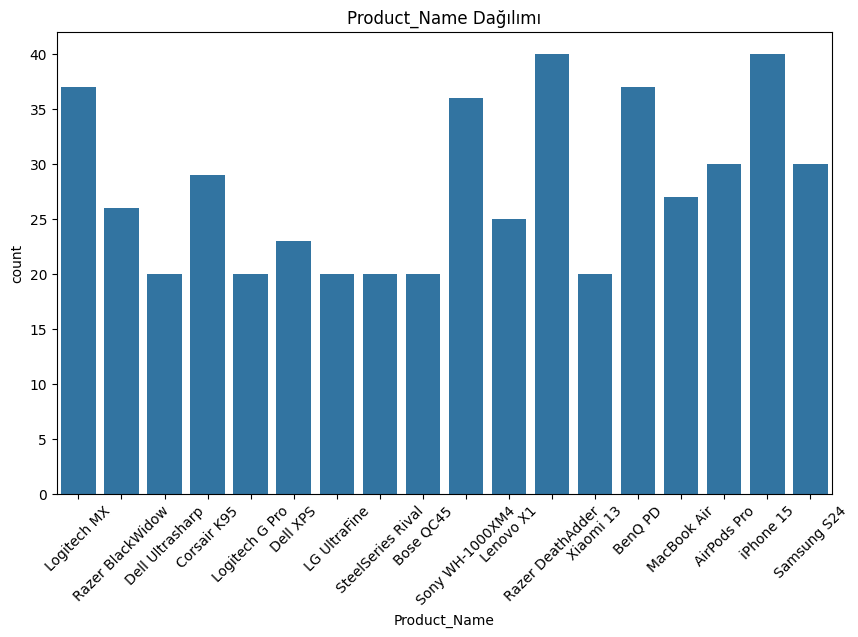


Category değişkeninin analizi:
Category
Aksesuar      258
Elektronik    167
Donanım        75
Name: count, dtype: int64


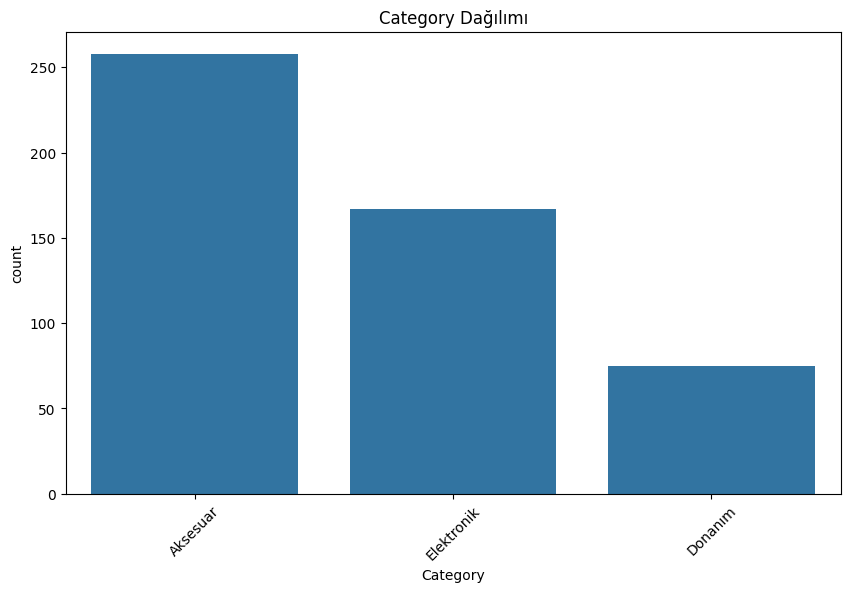


Price değişkeninin analizi:
count       432.000000
mean       4500.420602
std       14021.158133
min           1.000000
25%        1250.485000
50%        2453.960000
75%        3882.092500
max      100000.000000
Name: Price, dtype: float64


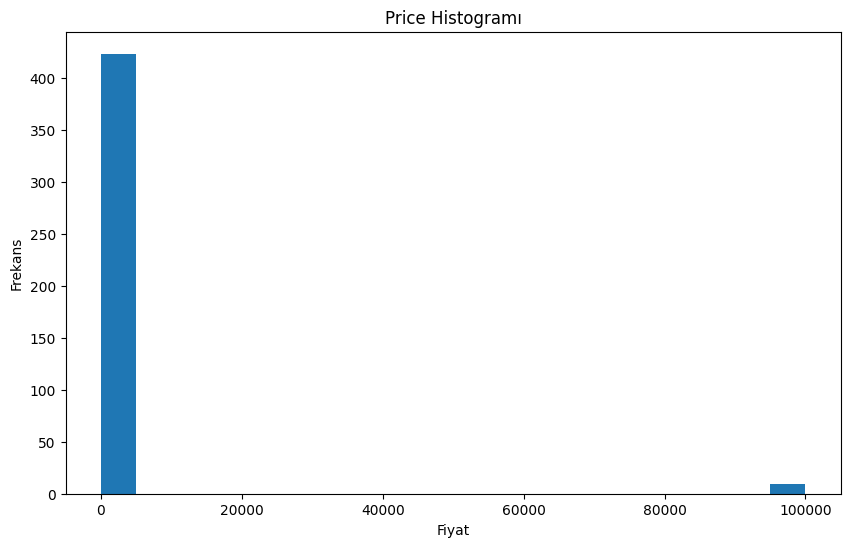


Quantity_Purchased değişkeninin analizi:
count     383
unique     10
top         5
freq       46
Name: Quantity_Purchased, dtype: object


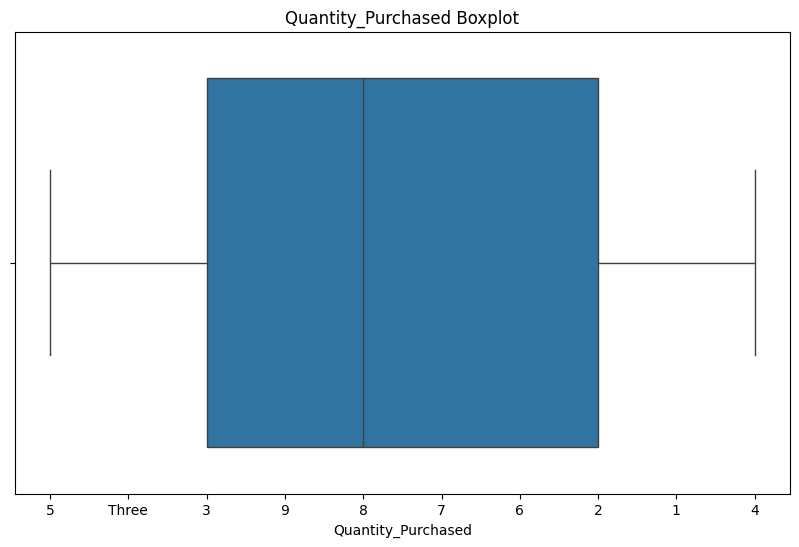


Customer_Satisfaction_Score değişkeninin analizi:
count     392
unique      6
top         2
freq       80
Name: Customer_Satisfaction_Score, dtype: object


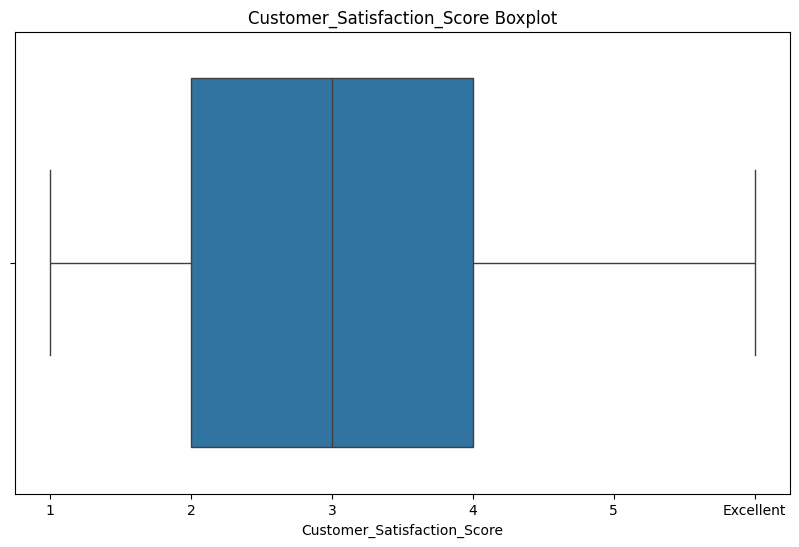

Customer_ID                     0
Product_Name                    0
Category                        0
Price                           0
Purchase_Date                  48
Quantity_Purchased             49
Customer_Satisfaction_Score    40
dtype: int64


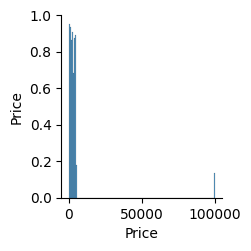

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kategorik değişkenlerin analizi
categorical_cols = ['Product_Name', 'Category']
for col in categorical_cols:
  print(f"\n{col} değişkeninin analizi:")
  print(df[col].value_counts())
  plt.figure(figsize=(10, 6))
  sns.countplot(x=col, data=df)
  plt.title(f'{col} Dağılımı')
  plt.xticks(rotation=45)
  plt.show()


numerical_cols = ['Price', 'Quantity_Purchased', 'Customer_Satisfaction_Score']

for col in numerical_cols:
    # NaN değerleri ve negatif değerleri ele alalım.
    if col == 'Price':
        df = df[df['Price'] > 0]  # Negatif fiyatları çıkar
        df = df.dropna(subset=['Price']) # price içindeki NaN değerlerini çıkaralım

    print(f"\n{col} değişkeninin analizi:")
    print(df[col].describe())

    plt.figure(figsize=(10, 6))
    if col == 'Price':
        # Price için histogram çizimi
        plt.hist(df['Price'], bins=20)  # Bin sayısını ayarla
        plt.xlabel('Fiyat')
        plt.ylabel('Frekans')
        plt.title(f'{col} Histogramı')
        plt.show()

    else:
      # Diğer sayısal değişkenler için boxplot
      sns.boxplot(x=col, data=df)
      plt.title(f'{col} Boxplot')
      plt.show()


print(df.isnull().sum())


sns.pairplot(df[['Price', 'Quantity_Purchased', 'Customer_Satisfaction_Score']])
plt.show()


# Price değişkeni null değerleri Q1 ile doldurma

In [ ]:
q1 = df['Price'].quantile(0.25) #1. çeyrek hesapla
df['Price1'] = df['Price'].fillna(q1) # NaN olan yerleri Q1 ile doldur

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,432.0,4500.420602,14021.158133,1.0,1250.485,2453.96,3882.0925,100000.0
Price1,432.0,4500.420602,14021.158133,1.0,1250.485,2453.96,3882.0925,100000.0


#Tarih değişkeni null değerleri mod ile doldurma

In [ ]:
most_frequent_date = df['Purchase_Date'].mode()[0]

print("En sık tekrar eden tarih:", most_frequent_date)

En sık tekrar eden tarih: 25-05-13


In [ ]:
df['Purchase_Date2'] = df['Purchase_Date'].fillna(df['Purchase_Date'].mode()[0])

# Quantity_Purchased hatalı değer (THREE>3) ve null için ürün ortalamaları atama

In [ ]:
df['Quantity_Purchased'].unique()

array(['5', 'Three', '3', '9', nan, '8', '7', '6', '2', '1', '4'],
      dtype=object)

In [ ]:
df['Quantity_Purchased'] = df['Quantity_Purchased'].replace('Three', 3)

In [ ]:
df['Quantity_Purchased'].unique()

array(['5', 3, '3', '9', nan, '8', '7', '6', '2', '1', '4'], dtype=object)

In [ ]:
df['Quantity_Purchased'] = pd.to_numeric(df['Quantity_Purchased'], errors='coerce')

In [ ]:
df['quantity1'] = df['Quantity_Purchased'].fillna(df.groupby('Product_Name')['Quantity_Purchased'].transform('mean')).round()

In [ ]:
nan_rows = df[df.isna().any(axis=1)]
nan_rows

,Customer_ID,Product_Name,Category,Price,Purchase_Date,Quantity_Purchased,Customer_Satisfaction_Score,Price1,Purchase_Date2,quantity1
2,CUST0003,Dell Ultrasharp,Elektronik,2584.10,NaN,5.0,2,2584.10,25-05-13,5.0
5,CUST0006,Dell XPS,Donanım,2987.81,NaN,3.0,3,2987.81,25-05-13,3.0
6,CUST0007,Dell Ultrasharp,Elektronik,625.84,NaN,9.0,1,625.84,25-05-13,9.0
7,CUST0008,Dell Ultrasharp,Elektronik,158.81,24-07-31,NaN,4,158.81,24-07-31,6.0
8,CUST0009,LG UltraFine,Elektronik,3950.77,24-08-03,NaN,5,3950.77,24-08-03,5.0
...,...,...,...,...,...,...,...,...,...,...
465,CUST0466,Dell XPS,Donanım,4558.58,NaN,5.0,1,4558.58,25-05-13,5.0
468,CUST0469,Sony WH-1000XM4,Aksesuar,3024.74,NaN,6.0,2,3024.74,25-05-13,6.0
480,CUST0481,Dell XPS,Donanım,3112.00,24-05-04,NaN,3,3112.00,24-05-04,5.0
483,CUST0484,AirPods Pro,Aksesuar,3461.93,24-07-22,8.0,NaN,3461.93,24-07-22,8.0


In [ ]:
# Gruplanmış ortalamaları hesapla
grouped_means = df.groupby('Product_Name')['Quantity_Purchased'].transform('mean').round()

# NaN değerlere sahip satırları filtrele
nan_rows = df[df['Quantity_Purchased'].isnull()]

# NaN değerlere sahip satırlarda gruplanmış ortalamaları göster
print(nan_rows[['Product_Name', 'Quantity_Purchased']].join(grouped_means.rename('Grouped_Mean')))

          Product_Name  Quantity_Purchased  Grouped_Mean
7      Dell Ultrasharp                 NaN           6.0
8         LG UltraFine                 NaN           5.0
12           Bose QC45                 NaN           4.0
13      Logitech G Pro                 NaN           6.0
20         Corsair K95                 NaN           4.0
24     Sony WH-1000XM4                 NaN           5.0
49    Razer DeathAdder                 NaN           5.0
54         MacBook Air                 NaN           5.0
58    Razer DeathAdder                 NaN           5.0
62        LG UltraFine                 NaN           5.0
63     Sony WH-1000XM4                 NaN           5.0
81         AirPods Pro                 NaN           6.0
106       LG UltraFine                 NaN           5.0
109            BenQ PD                 NaN           5.0
113        Corsair K95                 NaN           4.0
116          iPhone 15                 NaN           4.0
120           Dell XPS         

# Customer_Satisfaction_Score. Excellent olanları 5 yapma ve null'a ort atama

In [ ]:
df['Customer_Satisfaction_Score'].unique()


array(['1', '2', '3', '4', '5', 'Excellent', nan], dtype=object)

In [ ]:
df['Customer_Satisfaction_Score1'] = df['Customer_Satisfaction_Score'].replace('Excellent', 5)

In [ ]:
df['Customer_Satisfaction_Score1'] = pd.to_numeric(df['Customer_Satisfaction_Score1'], errors='coerce')

In [ ]:
df['Customer_Satisfaction_Score1'] = df['Customer_Satisfaction_Score1'].fillna(df.groupby('Product_Name')['Customer_Satisfaction_Score1'].transform('mean')).round()

#DUZENLENMIS VERIYI BIRAKMA

In [ ]:
df.isnull().sum()

,0
Customer_ID,0
Product_Name,0
Category,0
Price,0
Purchase_Date,48
Quantity_Purchased,49
Customer_Satisfaction_Score,40
Price1,0
Purchase_Date2,0
quantity1,0


In [ ]:
df.drop(columns=["Quantity_Purchased", "Customer_Satisfaction_Score",'Purchase_Date','Price'], inplace=True)

df.rename(columns={"Customer_Satisfaction_Score1": "Customer_Satisfaction_Score"}, inplace=True)
df.rename(columns={"Price1": "Price"}, inplace=True)
df.rename(columns={"Purchase_Date2": "  Purchase_Date"}, inplace=True)
df.rename(columns={"quantity1": "Quantity_Purchased"}, inplace=True)


In [ ]:
df.isnull().sum()

,0
Customer_ID,0
Product_Name,0
Category,0
Price,0
Purchase_Date,0
Quantity_Purchased,0
Customer_Satisfaction_Score,0


# Müşteri memnuniyeti puanlarını analiz ederek en popüler ürünleri belirleme


In [ ]:
grouped_means = df.groupby('Product_Name')['Customer_Satisfaction_Score'].transform('mean').round()

unique_combinations = df[['Product_Name']].join(grouped_means.rename('Grouped_Mean')).drop_duplicates()

max_mean_value = unique_combinations['Grouped_Mean'].max()

max_products = unique_combinations.loc[unique_combinations['Grouped_Mean'] == max_mean_value, ['Product_Name', 'Grouped_Mean']]

max_products

,Product_Name,Grouped_Mean
2,Dell Ultrasharp,4.0
8,LG UltraFine,4.0
10,SteelSeries Rival,4.0
48,Samsung S24,4.0


# Belirli kategorilerde fiyat güncelleme/ Aksesuar	 kategorisinde %10 indirim

In [ ]:
df['new_price'] = df['Price']
df.loc[df['Category'] == 'Aksesuar', 'new_price'] = df.loc[df['Category'] == 'Aksesuar', 'Price'] * 0.90

In [ ]:
df

,Customer_ID,Product_Name,Category,Price,Purchase_Date,Quantity_Purchased,Customer_Satisfaction_Score,new_price
0,CUST0001,Logitech MX,Aksesuar,311.49,24-11-19,5.0,1.0,280.341
1,CUST0002,Razer BlackWidow,Aksesuar,319.82,24-04-14,5.0,2.0,287.838
2,CUST0003,Dell Ultrasharp,Elektronik,2584.10,25-05-13,5.0,2.0,2584.100
3,CUST0004,Corsair K95,Aksesuar,2829.89,24-10-10,3.0,1.0,2546.901
4,CUST0005,Logitech G Pro,Aksesuar,1028.57,25-05-13,3.0,1.0,925.713
...,...,...,...,...,...,...,...,...
494,CUST0495,Corsair K95,Aksesuar,3615.65,24-12-24,1.0,3.0,3254.085
495,CUST0496,Logitech MX,Aksesuar,2069.80,24-04-21,4.0,3.0,1862.820
496,CUST0497,MacBook Air,Donanım,2609.73,24-11-29,5.0,2.0,2609.730
497,CUST0498,MacBook Air,Donanım,4031.65,24-11-29,4.0,4.0,4031.650


#**3.Veri Analizi**

En çok satın alınan ürünleri listeleyin


In [ ]:
most_purchased = (
    df.groupby('Product_Name')['Quantity_Purchased']
      .sum()
      .sort_values(ascending=False)
)

print("En çok satın alınan ürünler (toplam adet bazında):")
print(most_purchased)


En çok satın alınan ürünler (toplam adet bazında):
Product_Name
Razer DeathAdder     178.0
iPhone 15            166.0
Logitech MX          162.0
Sony WH-1000XM4      148.0
BenQ PD              146.0
Samsung S24          134.0
AirPods Pro          129.0
Lenovo X1            127.0
MacBook Air          113.0
Corsair K95          111.0
Dell Ultrasharp      111.0
Razer BlackWidow     103.0
Logitech G Pro        94.0
Dell XPS              92.0
SteelSeries Rival     87.0
LG UltraFine          83.0
Bose QC45             83.0
Xiaomi 13             82.0
Name: Quantity_Purchased, dtype: float64


#Fiyat ve satış miktarı arasındaki korelasyonu inceledik


 *Pozitif veya negatif güçlü bir ilişki yok: 0’a çok yakın bir korelasyon, “fiyat arttıkça miktar artıyor (pozitif korelasyon)” veya
“fiyat arttıkça miktar azalıyor (negatif korelasyon)” gibi belirgin bir eğilim olmadığı anlamına gelir.Pratik olarak “korelasyon yok” diyebiliriz: Katsayı 0.01’in bile altında,
dolayısıyla bu iki değişken arasında lineer bir ilişki olmadığını gösterir. (Elbette başka tür bir ilişki olabilir, ama doğrusal ilişki zayıf.)*


In [ ]:
correlation = df[['Price', 'Quantity_Purchased']].corr()

print("Fiyat ve Satın Alınan Miktar arasındaki korelasyon:")
print(correlation)

Fiyat ve Satın Alınan Miktar arasındaki korelasyon:
                       Price  Quantity_Purchased
Price               1.000000           -0.063899
Quantity_Purchased -0.063899            1.000000


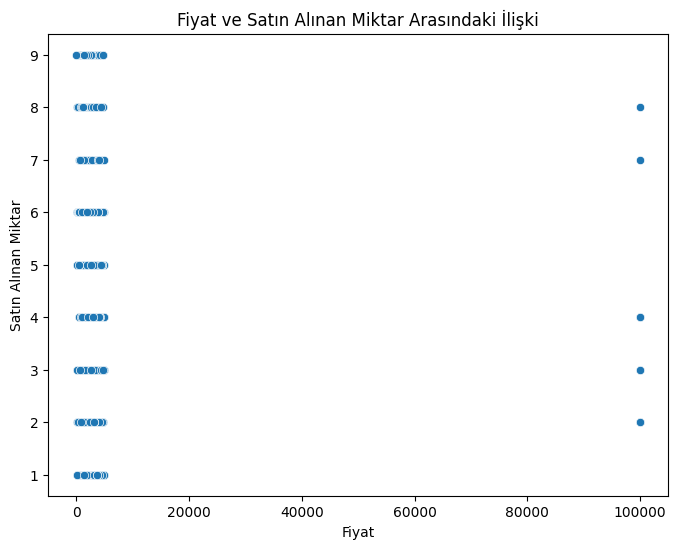

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Quantity_Purchased', data=df)
plt.title('Fiyat ve Satın Alınan Miktar Arasındaki İlişki')
plt.xlabel('Fiyat')
plt.ylabel('Satın Alınan Miktar')
plt.show()


#Kategorilere göre ortalama fiyat hesaplama

In [ ]:
avg_price_by_category = df.groupby('Category')['Price'].mean()

print("Kategorilere göre ortalama fiyat:")
print(avg_price_by_category)

Kategorilere göre ortalama fiyat:
Category
Aksesuar      4196.972883
Donanım       2616.680794
Elektronik    5766.005646
Name: Price, dtype: float64


In [ ]:
df.isnull().sum()

,0
Customer_ID,0
Product_Name,0
Category,0
Price,0
Purchase_Date,0
Quantity_Purchased,0
Customer_Satisfaction_Score,0
new_price,0


#Belirli bir zaman diliminde en çok satılan ürünleri bulun

In [ ]:
df.rename(columns={"  Purchase_Date": "Purchase_Date"}, inplace=True)

In [ ]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')

start_date = "2024-04-14"
end_date = "2024-10-10"

mask = (df['Purchase_Date'] >= start_date) & (df['Purchase_Date'] <= end_date)
filtered_df = df.loc[mask]

top_in_time_range = (
filtered_df.groupby('Product_Name')['Quantity_Purchased']
            .sum()
            .sort_values(ascending=False)
)

print(f"{start_date} ile {end_date} arasındaki en çok satılan ürünler:")
print(top_in_time_range)


2024-04-14 ile 2024-10-10 arasındaki en çok satılan ürünler:
Product_Name
iPhone 15           8.0
Dell Ultrasharp     5.0
Razer BlackWidow    2.0
Name: Quantity_Purchased, dtype: float64


<ipython-input-33-06cabced3e33>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')


#Müşteri harcama seviyelerine göre gruplama yapın

In [ ]:
df["Total_Price"] = df["new_price"] * df["Quantity_Purchased"]

df['Total_Price_Levels'] = pd.qcut(df['Total_Price'], q=[0, .3, .7, 1.], labels=['Low', 'Mid', 'High'])

In [ ]:
df.head(10)

,Customer_ID,Product_Name,Category,Price,Purchase_Date,Quantity_Purchased,Customer_Satisfaction_Score,new_price,Total_Price,Total_Price_Levels
0,CUST0001,Logitech MX,Aksesuar,311.49,2019-11-24,5.0,1.0,280.341,1401.705,Low
1,CUST0002,Razer BlackWidow,Aksesuar,319.82,2014-04-24,5.0,2.0,287.838,1439.190,Low
2,CUST0003,Dell Ultrasharp,Elektronik,2584.10,2013-05-25,5.0,2.0,2584.100,12920.500,Mid
3,CUST0004,Corsair K95,Aksesuar,2829.89,2010-10-24,3.0,1.0,2546.901,7640.703,Mid
4,CUST0005,Logitech G Pro,Aksesuar,1028.57,2013-05-25,3.0,1.0,925.713,2777.139,Low
5,CUST0006,Dell XPS,Donanım,2987.81,2013-05-25,3.0,3.0,2987.810,8963.430,Mid
6,CUST0007,Dell Ultrasharp,Elektronik,625.84,2013-05-25,9.0,1.0,625.840,5632.560,Mid
7,CUST0008,Dell Ultrasharp,Elektronik,158.81,2031-07-24,6.0,4.0,158.810,952.860,Low
8,CUST0009,LG UltraFine,Elektronik,3950.77,2003-08-24,5.0,5.0,3950.770,19753.850,High
9,CUST0010,Razer BlackWidow,Aksesuar,721.35,2010-04-24,9.0,2.0,649.215,5842.935,Mid


In [ ]:
df["Total_Price"].quantile(0.70) #doğruluğunu kontrol etmek için

15801.5394

# 4. Dinamik Fiyatlandırma
 *Ürünlerin ortalama fiyatlarını hesaplayarak aşırı pahalı veya ucuz ürünleri belirleyin*

In [ ]:

avg_price = df["new_price"].mean()
std_dev= df["new_price"].std()

max_low= avg_price - (1.5 * std_dev)
max_high=avg_price + (1.5 * std_dev)


In [ ]:
max_low_product = df[df["new_price"]<max_low]
print(max_low_product)
print(len(max_low_product)) #hiç yok

Empty DataFrame
Columns: [Customer_ID, Product_Name, Category, Price, Purchase_Date, Quantity_Purchased, Customer_Satisfaction_Score, new_price, Total_Price, Total_Price_Levels]
Index: []
0


In [ ]:
max_high_product = df[df["new_price"]>max_high]
print(max_high_product)
print(len(max_high_product)) #9 ürün çok pahalı ürünlerimiz

    Customer_ID      Product_Name    Category     Price Purchase_Date  \
102    CUST0103         Xiaomi 13  Elektronik  100000.0    2012-03-24   
127    CUST0128           BenQ PD  Elektronik  100000.0    2014-12-24   
162    CUST0163       Corsair K95    Aksesuar  100000.0    2007-03-25   
240    CUST0241         Bose QC45    Aksesuar  100000.0    2013-05-25   
247    CUST0248    Logitech G Pro    Aksesuar  100000.0    2008-03-25   
253    CUST0254           BenQ PD  Elektronik  100000.0    2005-09-24   
291    CUST0292         iPhone 15  Elektronik  100000.0    2006-09-24   
349    CUST0350       Samsung S24  Elektronik  100000.0    2013-05-25   
488    CUST0489  Razer BlackWidow    Aksesuar  100000.0    2015-03-24   

     Quantity_Purchased  Customer_Satisfaction_Score  new_price  Total_Price  \
102                 3.0                          3.0   100000.0     300000.0   
127                 4.0                          1.0   100000.0     400000.0   
162                 4.0      

# Piyasadan belirli bir oranda düşük fiyatlı ürünlerin fiyatını güncelleyin

In [ ]:
df['new_price2'] = df['new_price']
df.loc[df['Total_Price_Levels'] == 'Low', 'new_price2'] *= 1.10
df

,Customer_ID,Product_Name,Category,Price,Purchase_Date,Quantity_Purchased,Customer_Satisfaction_Score,new_price,Total_Price,Total_Price_Levels,new_price2
0,CUST0001,Logitech MX,Aksesuar,311.49,2019-11-24,5.0,1.0,280.341,1401.705,Low,308.3751
1,CUST0002,Razer BlackWidow,Aksesuar,319.82,2014-04-24,5.0,2.0,287.838,1439.190,Low,316.6218
2,CUST0003,Dell Ultrasharp,Elektronik,2584.10,2013-05-25,5.0,2.0,2584.100,12920.500,Mid,2584.1000
3,CUST0004,Corsair K95,Aksesuar,2829.89,2010-10-24,3.0,1.0,2546.901,7640.703,Mid,2546.9010
4,CUST0005,Logitech G Pro,Aksesuar,1028.57,2013-05-25,3.0,1.0,925.713,2777.139,Low,1018.2843
...,...,...,...,...,...,...,...,...,...,...,...
494,CUST0495,Corsair K95,Aksesuar,3615.65,2024-12-24,1.0,3.0,3254.085,3254.085,Low,3579.4935
495,CUST0496,Logitech MX,Aksesuar,2069.80,2021-04-24,4.0,3.0,1862.820,7451.280,Mid,1862.8200
496,CUST0497,MacBook Air,Donanım,2609.73,2029-11-24,5.0,2.0,2609.730,13048.650,Mid,2609.7300
497,CUST0498,MacBook Air,Donanım,4031.65,2029-11-24,4.0,4.0,4031.650,16126.600,High,4031.6500


# **5. Ürün Öneri Sistemi**
 *Müşterilere, satın aldıkları ürünlere benzer en popüler ürünleri önerin
 Öneri sistemini kategori bazında geliştirin*


**500 adet farklı musterı ve sıparıs bılgısı ıceren datamız vardı bunun ıcın aşağıdaki kod bloğu ile veriye ekleme yaparak musterıler ıcın farklı sıparısler de olusturuldu. Daha öncesinde yapılan işlemler yeni eklenen veriler için de tekrarlandı.**



```
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Mevcut df'niz varsayılan olarak burada tanımlı olmalıdır
# Örneğin:
# df = pd.DataFrame({
#     "Customer_ID": [...],
#     "Product_Name": [...],
#     "Category": [...],
#     "Price": [...],
#     "Purchase_Date": [...],
#     "Quantity_Purchased": [...],
#     "Customer_Satisfaction_Score": [...]
# })

# Ürün adları ve markalar
product_brands = {
    "Telefon": ["iPhone 15", "Samsung S24", "Xiaomi 13"],
    "Bilgisayar": ["MacBook Air", "Dell XPS", "Lenovo X1"],
    "Monitör": ["LG UltraFine", "Dell Ultrasharp", "BenQ PD"],
    "Mouse": ["Logitech MX", "Razer DeathAdder", "SteelSeries Rival"],
    "Klavye": ["Corsair K95", "Razer BlackWidow", "Logitech G Pro"],
    "Kulaklık": ["Sony WH-1000XM4", "Bose QC45", "AirPods Pro"]
}

# Ürün - Kategori eşleşmesi
category_mapping = {
    "Telefon": "Elektronik",
    "Bilgisayar": "Donanım",
    "Monitör": "Elektronik",
    "Mouse": "Aksesuar",
    "Klavye": "Aksesuar",
    "Kulaklık": "Aksesuar"
}

# Her ürün modeli için sabit fiyatlar belirleme
fixed_prices = {
    "iPhone 15": 39999,
    "Samsung S24": 32999,
    "Xiaomi 13": 17999,
    "MacBook Air": 49999,
    "Dell XPS": 46999,
    "Lenovo X1": 42999,
    "LG UltraFine": 12499,
    "Dell Ultrasharp": 13499,
    "BenQ PD": 10999,
    "Logitech MX": 2999,
    "Razer DeathAdder": 1999,
    "SteelSeries Rival": 2499,
    "Corsair K95": 4999,
    "Razer BlackWidow": 4499,
    "Logitech G Pro": 4299,
    "Sony WH-1000XM4": 8999,
    "Bose QC45": 9999,
    "AirPods Pro": 7999
}

# Yeni satın alma kayıtlarını depolamak için bir liste
new_records = []

# Mevcut müşterilerin listesi
existing_customers = df['Customer_ID'].unique()

for customer_id in existing_customers:
    # Her müşteri için rastgele sayıda ek satın alma (1 ile 5 arasında)
    num_additional_purchases = np.random.randint(1, 6)
    for _ in range(num_additional_purchases):
        # Rastgele bir ürün seçimi
        product_category = np.random.choice(list(product_brands.keys()))
        product_name = np.random.choice(product_brands[product_category])
        category = category_mapping[product_category]
        price = fixed_prices[product_name]
        # Rastgele satın alma tarihi (son 365 gün içinde)
        purchase_date = (datetime.now() - timedelta(days=np.random.randint(0, 365))).strftime("%Y-%m-%d")
        # Rastgele satın alınan miktar (1 ile 5 arasında)
        quantity_purchased = np.random.randint(1, 6)
        # Rastgele müşteri memnuniyeti skoru (1 ile 5 arasında)
        customer_satisfaction_score = np.random.randint(1, 6)

        # Yeni kaydı oluşturma
        new_record = {
            "Customer_ID": customer_id,
            "Product_Name": product_name,
            "Category": category,
            "Price": price,
            "Purchase_Date": purchase_date,
            "Quantity_Purchased": quantity_purchased,
            "Customer_Satisfaction_Score": customer_satisfaction_score
        }
        new_records.append(new_record)

# Yeni kayıtları içeren DataFrame oluşturma
new_df = pd.DataFrame(new_records)

# Mevcut df ile yeni df'yi birleştirme
df1 = pd.concat([df, new_df], ignore_index=True)

# Sonuçları kontrol etme
print(df1.head())
print(df1.tail())

# # Belirli kategorilerde fiyat güncelleme/ Aksesuar	 kategorisinde %10 indirim
df1['new_price'] = df1['Price']
df1.loc[df1['Category'] == 'Aksesuar', 'new_price'] = df1.loc[df1['Category'] == 'Aksesuar', 'Price'] * 0.90


#Müşteri harcama seviyelerine göre gruplama yapın

df1["Total_Price"] = df1["new_price"] * df1["Quantity_Purchased"]

df1['Total_Price_Levels'] = pd.qcut(df1['Total_Price'], q=[0, .3, .7, 1.], labels=['Low', 'Mid', 'High'])

a=df1["Total_Price"].quantile(0.70) #doğruluğunu kontrol ettik


df1["Total_Price"] = df1["new_price"] * df1["Quantity_Purchased"]

df1['Total_Price_Levels'] = pd.qcut(df1['Total_Price'], q=[0, .3, .7, 1.], labels=['Low', 'Mid', 'High'])

a=df1["Total_Price"].quantile(0.70) #doğruluğunu kontrol ettik

df1['new_price2'] = df1['new_price']
df1.loc[df1['Total_Price_Levels'] == 'Low', 'new_price2'] *= 1.10
print(df1)


json_str = df1.to_json(orient='records', force_ascii=False)

json_dosya_adi = "veri.json"
df1.to_json(json_dosya_adi, orient="records", indent=4, force_ascii=False)


```



In [ ]:
with open('/content/data.json', 'r', encoding='utf-8') as dosya:
    veri = json.load(dosya)


In [ ]:
from pandas import json_normalize

df = json_normalize(veri['datas'])

In [ ]:
df


,Customer_ID,Product_Name,Category,Purchase_Date,Price,Quantity_Purchased,Customer_Satisfaction_Score,new_price,Total_Price,Total_Price_Levels,new_price2
0,CUST0001,Logitech MX,Aksesuar,1731974400000,311.49,5.0,1.0,280.341,1401.705,Low,308.3751
1,CUST0002,Razer BlackWidow,Aksesuar,1713052800000,319.82,5.0,2.0,287.838,1439.190,Low,316.6218
2,CUST0003,Dell Ultrasharp,Elektronik,None,2584.10,5.0,2.0,2584.100,12920.500,Mid,2584.1000
3,CUST0004,Corsair K95,Aksesuar,1728518400000,2829.89,3.0,1.0,2546.901,7640.703,Low,2801.5911
4,CUST0005,Logitech G Pro,Aksesuar,None,1028.57,3.0,1.0,925.713,2777.139,Low,1018.2843
...,...,...,...,...,...,...,...,...,...,...,...
2063,CUST0499,Xiaomi 13,Elektronik,2024-10-25,17999.00,5.0,2.0,17999.000,89995.000,High,17999.0000
2064,CUST0499,Razer DeathAdder,Aksesuar,2025-01-16,1999.00,2.0,3.0,1799.100,3598.200,Low,1979.0100
2065,CUST0499,Logitech G Pro,Aksesuar,2025-01-28,4299.00,5.0,3.0,3869.100,19345.500,Mid,3869.1000
2066,CUST0500,iPhone 15,Elektronik,2024-04-23,39999.00,1.0,2.0,39999.000,39999.000,Mid,39999.0000


In [ ]:
category_popularity = df.groupby(['Category', 'Product_Name'])['Quantity_Purchased'].sum().reset_index()
category_popularity = category_popularity.sort_values(by=['Category', 'Quantity_Purchased'], ascending=[True, False])


customer_recommendations = {}
for _, row in df.iterrows():
    customer_id = row['Customer_ID']
    category = row['Category']
    purchased_product = row['Product_Name']


    popular_products = category_popularity[(category_popularity['Category'] == category) & (category_popularity['Product_Name'] != purchased_product)]
    recommendations = popular_products['Product_Name'].head(3).tolist()

    customer_recommendations[customer_id] = {
        "purchased_product": purchased_product,
        "recommended_products": recommendations}

for customer, recommendations in customer_recommendations.items():
    print(f"Müşteri {customer} - Satın aldığı ürün: {recommendations['purchased_product']}")
    print(f"Önerilen ürünler: {', '.join(recommendations['recommended_products'])}\n")


Müşteri CUST0001 - Satın aldığı ürün: Bose QC45
Önerilen ürünler: Razer DeathAdder, Logitech MX, Sony WH-1000XM4

Müşteri CUST0002 - Satın aldığı ürün: MacBook Air
Önerilen ürünler: Lenovo X1, Dell XPS

Müşteri CUST0003 - Satın aldığı ürün: Razer BlackWidow
Önerilen ürünler: Razer DeathAdder, Logitech MX, Sony WH-1000XM4

Müşteri CUST0004 - Satın aldığı ürün: Sony WH-1000XM4
Önerilen ürünler: Razer DeathAdder, Logitech MX, Razer BlackWidow

Müşteri CUST0005 - Satın aldığı ürün: AirPods Pro
Önerilen ürünler: Razer DeathAdder, Logitech MX, Sony WH-1000XM4

Müşteri CUST0006 - Satın aldığı ürün: Logitech G Pro
Önerilen ürünler: Razer DeathAdder, Logitech MX, Sony WH-1000XM4

Müşteri CUST0007 - Satın aldığı ürün: Dell Ultrasharp
Önerilen ürünler: iPhone 15, BenQ PD, Samsung S24

Müşteri CUST0008 - Satın aldığı ürün: Razer BlackWidow
Önerilen ürünler: Razer DeathAdder, Logitech MX, Sony WH-1000XM4

Müşteri CUST0009 - Satın aldığı ürün: MacBook Air
Önerilen ürünler: Lenovo X1, Dell XPS

Müşte

In [ ]:
print(category_popularity) #kontrol sağlandı

      Category       Product_Name  Quantity_Purchased
6     Aksesuar   Razer DeathAdder               463.0
4     Aksesuar        Logitech MX               450.0
7     Aksesuar    Sony WH-1000XM4               433.0
5     Aksesuar   Razer BlackWidow               426.0
3     Aksesuar     Logitech G Pro               417.0
0     Aksesuar        AirPods Pro               410.0
2     Aksesuar        Corsair K95               378.0
8     Aksesuar  SteelSeries Rival               376.0
1     Aksesuar          Bose QC45               301.0
11     Donanım        MacBook Air               425.0
10     Donanım          Lenovo X1               393.0
9      Donanım           Dell XPS               338.0
17  Elektronik          iPhone 15               490.0
12  Elektronik            BenQ PD               449.0
13  Elektronik    Dell Ultrasharp               384.0
15  Elektronik        Samsung S24               376.0
14  Elektronik       LG UltraFine               360.0
16  Elektronik          Xiao